In [4]:
from aquabyte.data_access_utils import RDSAccessUtils, S3AccessUtils
import json
import os
import  pandas as pd
from aquabyte.visualize import Visualizer
import matplotlib.patches as patches
from tqdm import tqdm

import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

%matplotlib inline

import cv2
from PIL import Image, ImageEnhance 
import numpy as np
import matplotlib.pyplot as plt
from random import randint, seed

from os import listdir
from os.path import isfile, join
import random 

In [5]:
from utils import utils
import shutil
import glob

In [6]:
SEED = 33
CROP_WIDTH = 512
CROP_HEIGHT = 512

#LICE_CATEGORY = ['ADULT_FEMALE', 'MOVING', 'SCOTTISH_ADULT_FEMALE', 'UNSURE']
LABEL_PATH = 'data/moving_lice_crop_labels'
IMAGE_PATH = 'data/moving_lice_crop_images'



In [39]:
import importlib
importlib.reload(utils)

<module 'utils.utils' from '/root/jane/cv_research/jane/lice_counting/utils/utils.py'>

In [43]:
image_files = [join(IMAGE_PATH, f) for f in listdir(IMAGE_PATH) if isfile(join(IMAGE_PATH, f))]

for i, image_f in enumerate(image_files):
    if i <= 100:
        continue
    if i > 200:
        break
    fig, ax = plt.subplots(figsize=(10, 10)) 
    image = plt.imread(image_f)
    #image = Image.open(image_f)
    
    #print(fig.get_size_inches()*fig.dpi)

    alpha = 3 # Contrast control (1.0-3.0)
    beta = 20 # Brightness control (0-100)

    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    ax.imshow(adjusted)
    plt.title(image_f)
    
    label_path = image_f.replace("images", "labels").replace(".png", ".txt").replace(".jpg", ".txt")
    labels = np.loadtxt(label_path).reshape(-1, 5)
    print(labels)
    for label in labels:
        class_index, yolobbox = int(label[0]), label[1:]
        x, y, w, h = utils.yolobbox2xywh(yolobbox, [CROP_WIDTH, CROP_HEIGHT])
        #ec = ['b', 'r', 'grey', 'green'][class_index]
        ec = 'r'
        rect = patches.Rectangle((x, y), w, h,linewidth=1,edgecolor=ec,facecolor='none')
        ax.add_patch(rect)
    print(image_f)
        
    plt.show()

In [90]:
# copy test image in data/test.txt to folder data/test_image


for image_path in open('data/test.txt', "r").readlines():
    shutil.copy(image_path.rstrip(), "data/test_image")

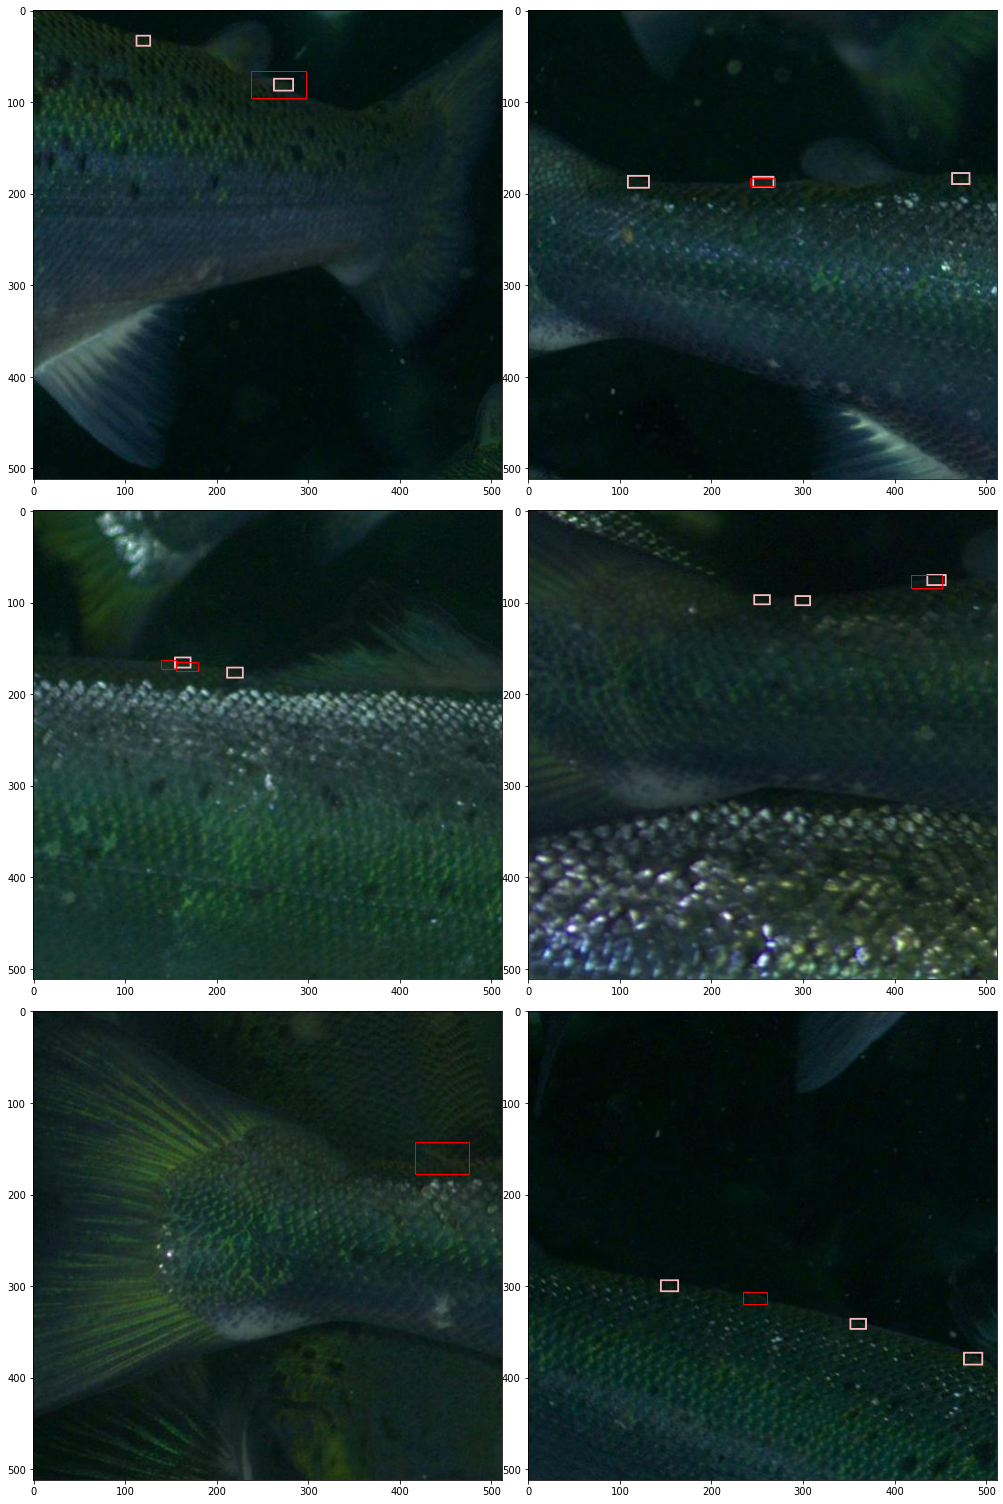

In [91]:
TEST_OUTPUT_PATH = 'output'
image_files = [join(TEST_OUTPUT_PATH, f) for f in listdir(TEST_OUTPUT_PATH) if isfile(join(TEST_OUTPUT_PATH, f))]

ncols = 2
figure, axes = plt.subplots(nrows=3, ncols=ncols, figsize=(14, 21))

for i, image_f in enumerate(image_files):
    rect = None 

    #image = plt.imread(image_f)
    image = Image.open(image_f)

    enhancer = ImageEnhance.Contrast(image)
    enhanced_im = enhancer.enhance(1)

    axes[i // ncols , i % ncols].imshow(enhanced_im)
    #print(fig.get_dpi())


    label_path = image_f.replace("output", "data/moving_lice_crop_labels").replace(".png", ".txt").replace(".jpg", ".txt")

    labels = np.loadtxt(label_path).reshape(-1, 5)

    
    for label in labels:
        class_index, yolobbox = int(label[0]), label[1:]
        x, y, w, h = utils.yolobbox2xywh(yolobbox, [CROP_WIDTH, CROP_HEIGHT])
        #ec = ['b', 'r', 'grey', 'green'][class_index]
        ec = "r"
        rect = patches.Rectangle((x, y), w, h,linewidth=1,edgecolor=ec,facecolor='none')
        axes[i // ncols , i % ncols ].add_patch(rect)

    
figure.tight_layout()



In [ ]:
1892/512

In [74]:


file1 = open('data/train.txt', 'r') 
Lines = file1.readlines() 
  
# Strips the newline character 
for line in Lines: 
    line = line.rstrip()
    label_path = line.replace("images", "labels").replace(".png", ".txt").replace(".jpg", ".txt")
    labels = np.loadtxt(label_path).reshape(-1, 5)
    for label in labels:
        class_index = int(label[0])
        if class_index > 1:
            print(line)
            print(labels)
            break


data/multi_lice_crop_images/left_978_539_3574_1774_CROP_0_1.jpg
[[0.         0.80664062 0.53222656 0.203125   0.12304688]
 [0.         0.5859375  0.921875   0.22265625 0.07421875]]
data/multi_lice_crop_images/left_978_539_3574_1774_CROP_0_1.jpg
[[0.         0.80664062 0.53222656 0.203125   0.12304688]
 [0.         0.5859375  0.921875   0.22265625 0.07421875]]
data/multi_lice_crop_images/left_978_539_3574_1774_CROP_0_1.jpg
[[0.         0.80664062 0.53222656 0.203125   0.12304688]
 [0.         0.5859375  0.921875   0.22265625 0.07421875]]
data/multi_lice_crop_images/left_978_539_3574_1774_CROP_0_1.jpg
[[0.         0.80664062 0.53222656 0.203125   0.12304688]
 [0.         0.5859375  0.921875   0.22265625 0.07421875]]
data/multi_lice_crop_images/left_28_1898_2828_2777_CROP_0_1.jpg
[[0.         0.77539062 0.33691406 0.15234375 0.05273438]]
data/multi_lice_crop_images/left_754_2180_3422_3000_CROP_0_1.jpg
[[1.         0.26269531 0.70410156 0.04492188 0.04101562]
 [1.         0.30957031 0.7099

In [75]:
file1 = open('data/train.txt', 'r') 
Lines = file1.readlines() 

count = [0, 0]
# Strips the newline character 
for line in Lines: 
    line = line.rstrip()
    label_path = line.replace("images", "labels").replace(".png", ".txt").replace(".jpg", ".txt")
    labels = np.loadtxt(label_path).reshape(-1, 5)
    for label in labels:
        class_index = int(label[0])
        count[class_index] += 1

In [76]:
count

[23, 25]